In [1]:
import matplotlib.pyplot as plt
from core.solver import CaptioningSolver
from core.model import CaptionGenerator
from core.utils import load_coco_data, decode_captions
from core.bleu import evaluate

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
# load sparse features
data = load_coco_data(data_path='./data', split='train', feature='conv5_3')
word_to_idx = data['word_to_idx']

image_idxs <type 'numpy.ndarray'> (400131,) int32
captions <type 'numpy.ndarray'> (400131, 17) int32
word_to_idx <type 'dict'> 11071
features <type 'numpy.ndarray'> (82783, 196, 512) float32
file_names <type 'numpy.ndarray'> (82783,) <U31
elapse time: 24.63


In [3]:
model = CaptionGenerator(word_to_idx, dim_feature=[196, 512], dim_embed=512,
                                   dim_hidden=1500, n_time_step=16, cell_type='lstm', prev2out=True, 
                                             ctx2out=True, alpha_c=1.0, selector=True, use_dropout=True)

In [59]:
solver = CaptioningSolver(model, data, n_epochs=40, batch_size=256, update_rule='adam',
                                      learning_rate=0.0005, print_every=3000, save_every=2, image_path='./image/train2014_resized',
                                pretrained_model=None, model_path='./model/lstm_conv5_3', test_model='./model/lstm_conv5_3/model-16', test_batch_size=100,
                                 candidate_caption_path='./data/', test_image_path='./image/val2014_resized')

In [ ]:
solver.train()

Sampled Caption: a snowboarder is doing a trick in the air .


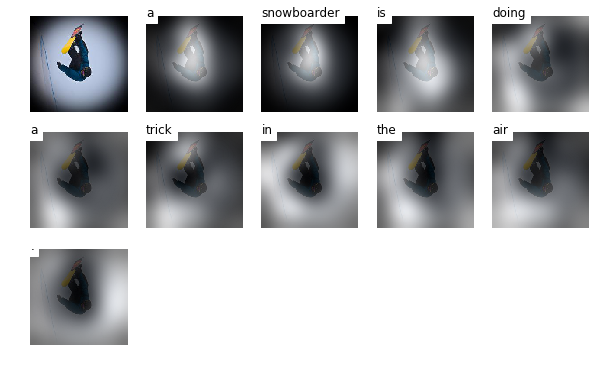

Sampled Caption: a table with plates of food and cups on it .


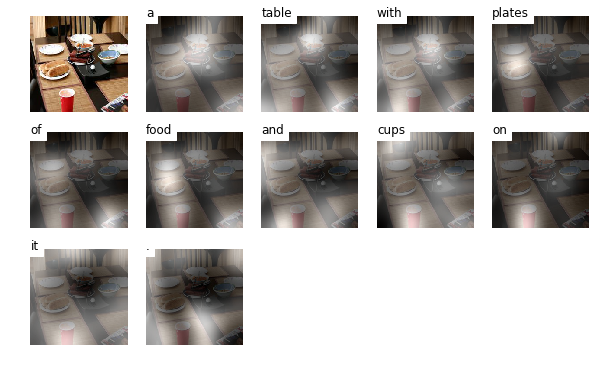

Sampled Caption: a man riding a skateboard on a ramp .


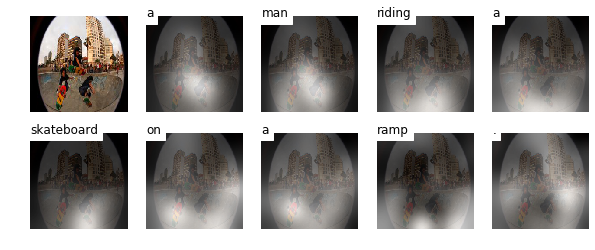

Sampled Caption: a large building with a clock tower on top .


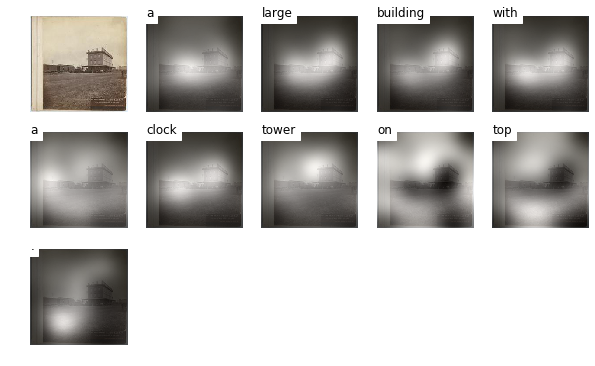

Sampled Caption: a man riding a horse on a dirt road .


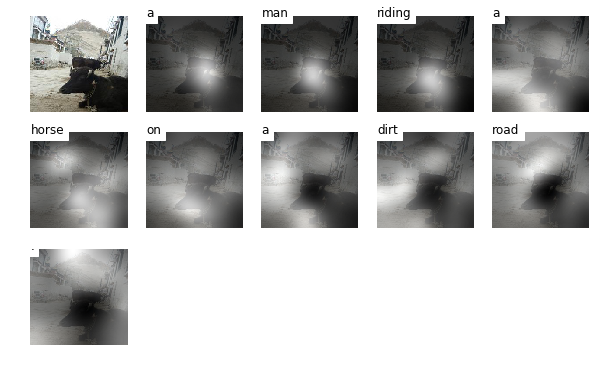

Sampled Caption: a cat sitting in a bowl on a table .


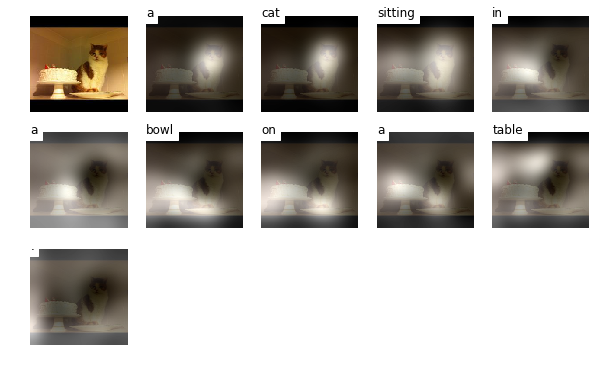

Sampled Caption: a plate of food with a salad and a salad .


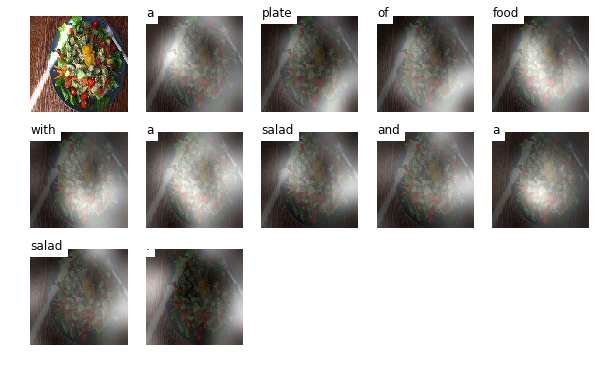

Sampled Caption: a large elephant standing next to a wooden fence .


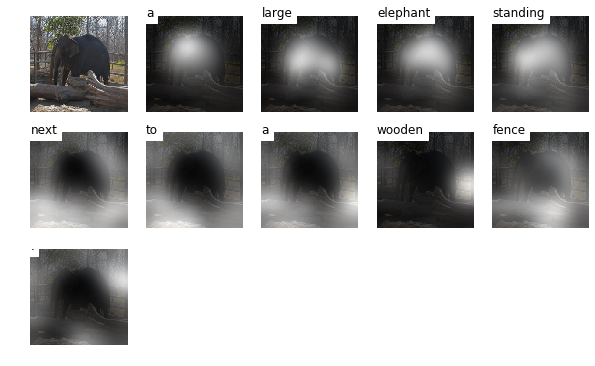

Sampled Caption: a man in a suit and tie standing in a hallway .


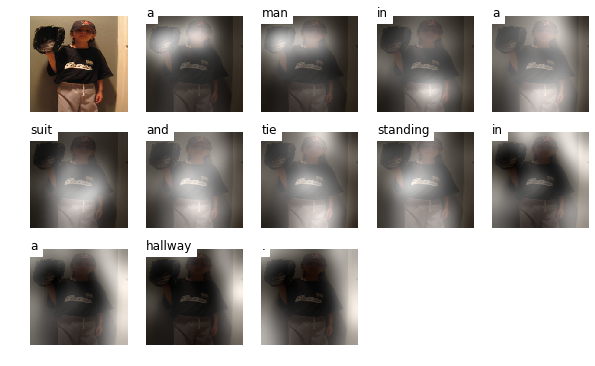

Sampled Caption: a man is sitting on a skateboard in a parking lot .


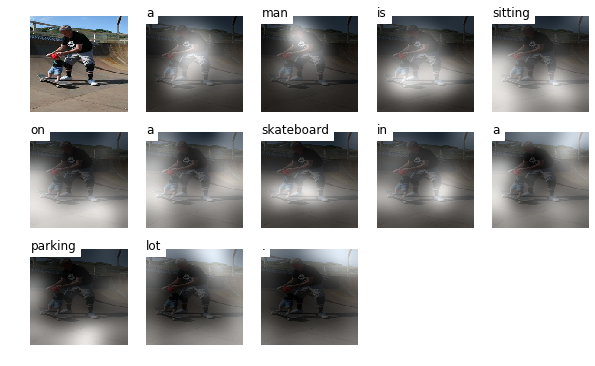

saved train.candidate.captions.pkl..


In [28]:
# sampled captions and visualize attention weigths for train dataset
solver.test(data)

In [52]:
# load validation dataset
val_data = load_coco_data(data_path='./data', split='val', feature='conv5_3')

image_idxs <type 'numpy.ndarray'> (24221,) int32
captions <type 'numpy.ndarray'> (24221, 17) int32
features <type 'numpy.ndarray'> (5000, 196, 512) float32
file_names <type 'numpy.ndarray'> (5000,) |S29
elapse time: 1.41


Sampled Caption: a black and white clock sitting on the side of a road .


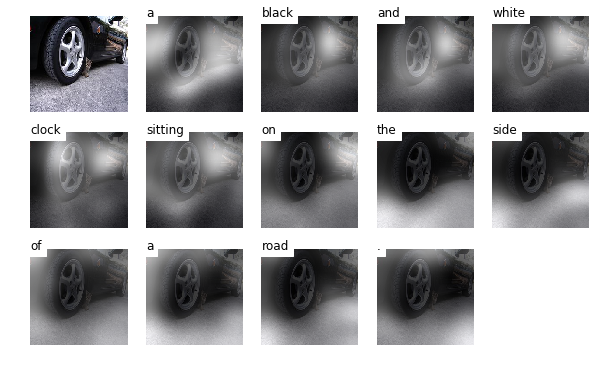

Sampled Caption: a group of people standing in a room .


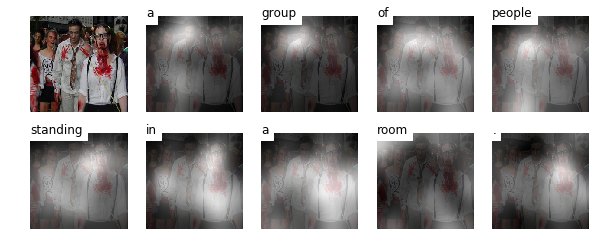

Sampled Caption: a man is walking down a rainy street .


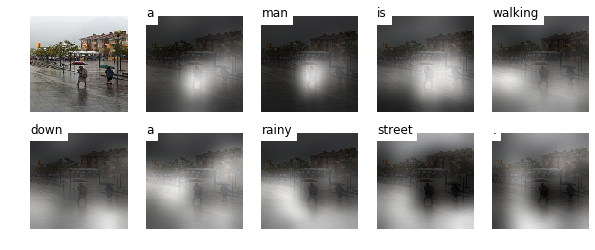

Sampled Caption: a bus that is sitting in the street .


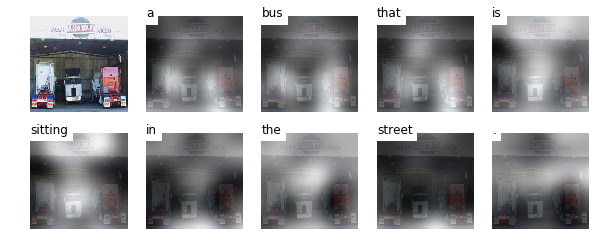

Sampled Caption: a person riding a skate board on a skate park .


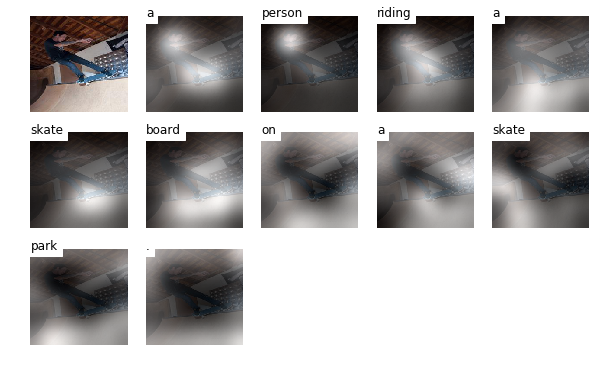

Sampled Caption: a man sitting on a chair with a laptop .


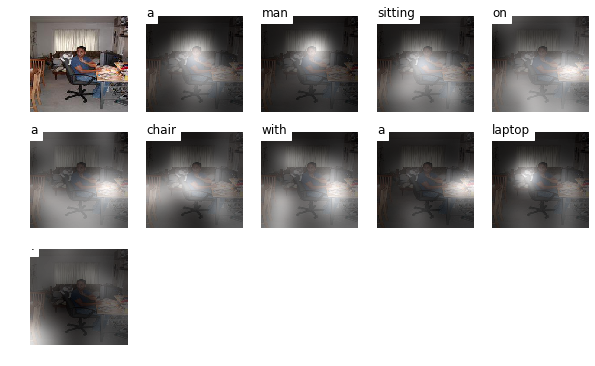

Sampled Caption: a man is standing on a beach with a surfboard .


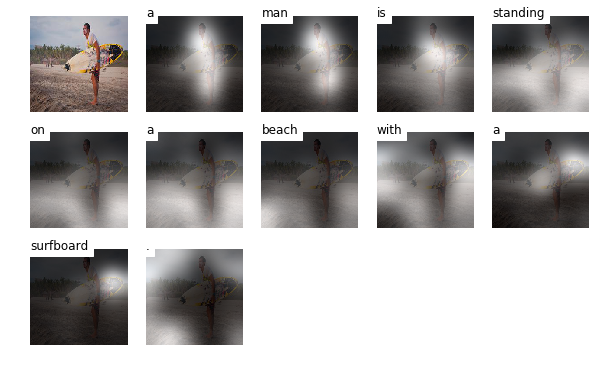

Sampled Caption: a woman is riding a bike in the rain .


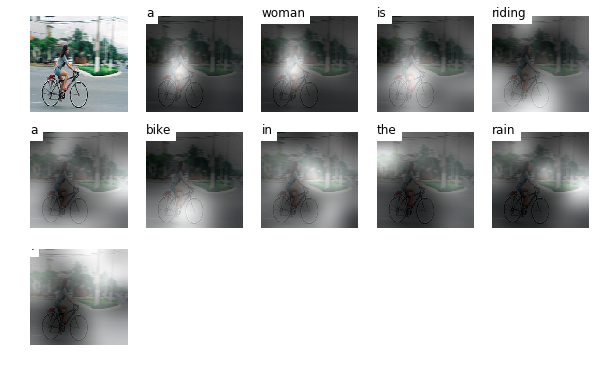

Sampled Caption: a man is doing a trick on a skateboard .


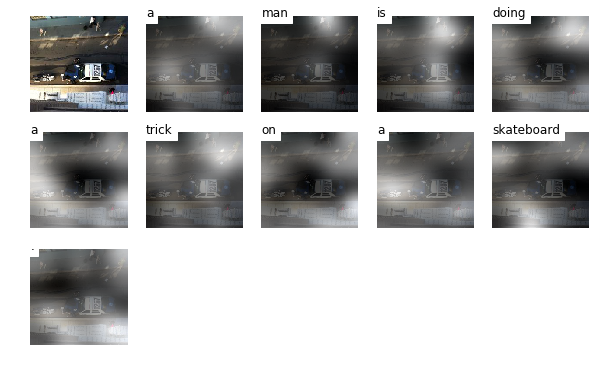

Sampled Caption: a man sitting in a chair with a bag .


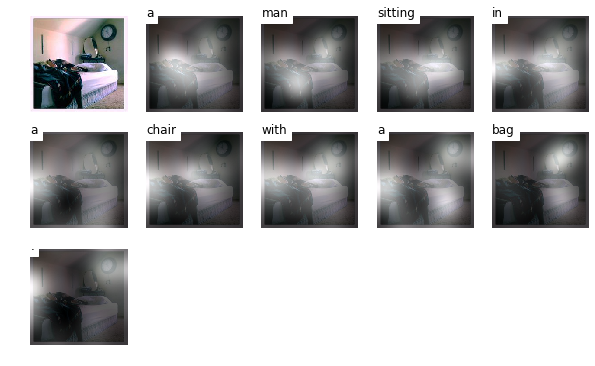

saved val.candidate.captions.pkl..


In [60]:
# sampled captions and visualize attention weights for validation dataset
solver.test(val_data, split='val')

In [61]:
# load test dataset
test_data = load_coco_data(data_path='./data', split='test')

image_idxs <type 'numpy.ndarray'> (24200,) int32
captions <type 'numpy.ndarray'> (24200, 17) int32
features <type 'numpy.ndarray'> (5000, 196, 512) float32
file_names <type 'numpy.ndarray'> (5000,) |S29
elapse time: 1.41


Sampled Caption: a bathroom with a sink mirror and shower in it .


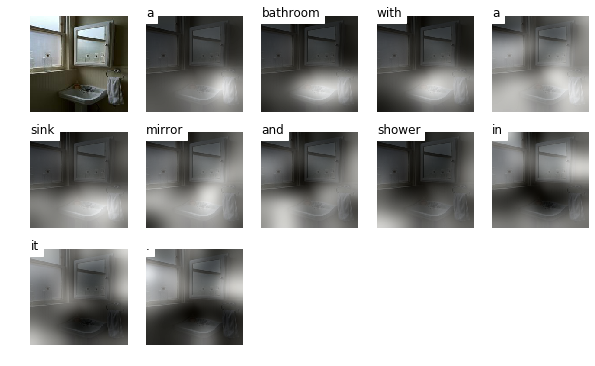

Sampled Caption: a bowl of fruit is sitting on a table .


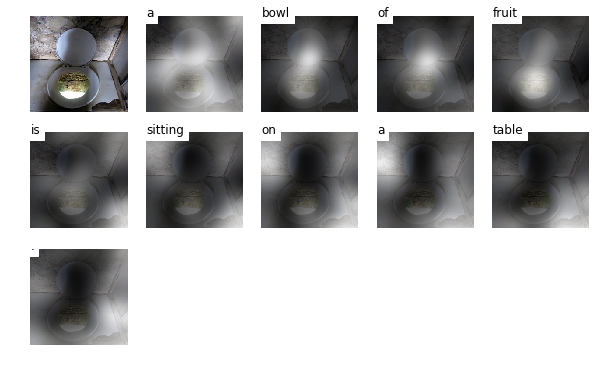

Sampled Caption: a street sign with a man standing next to it .


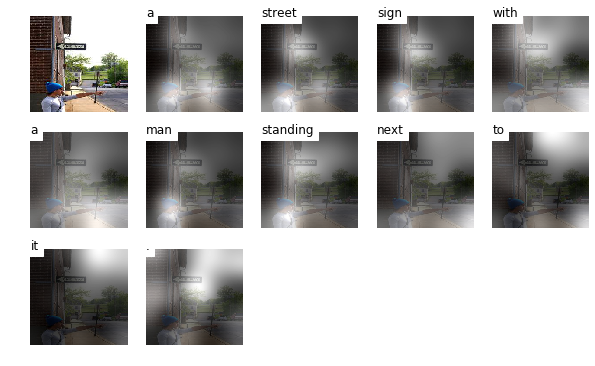

Sampled Caption: a stuffed bear with a red hat on .


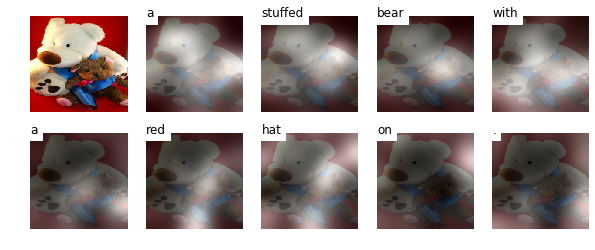

Sampled Caption: a person holding a plate with a pizza on it .


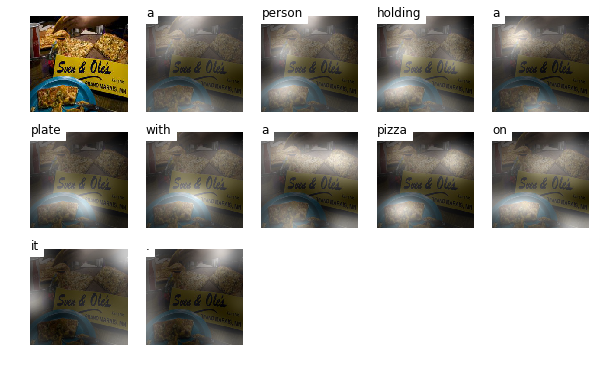

Sampled Caption: a couple of boats that are sitting in the water .


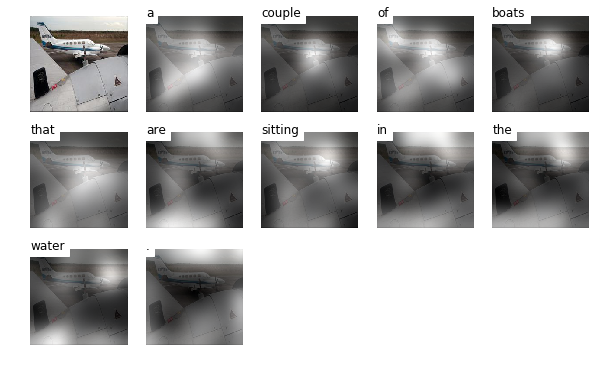

Sampled Caption: a giraffe and a zebra are in the wild .


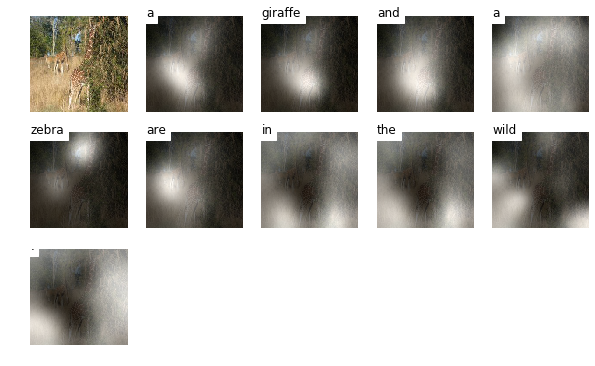

Sampled Caption: a man riding a bike with a basket on the back .


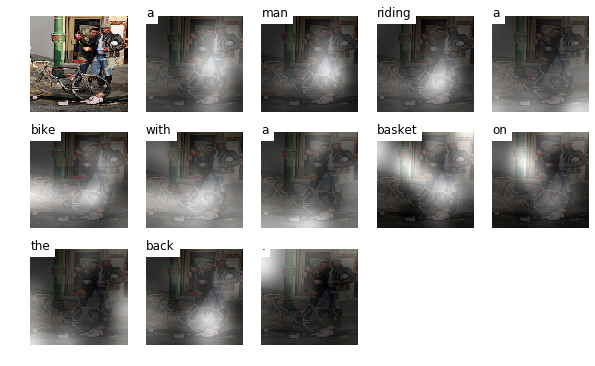

Sampled Caption: a room with a bed and a window in it .


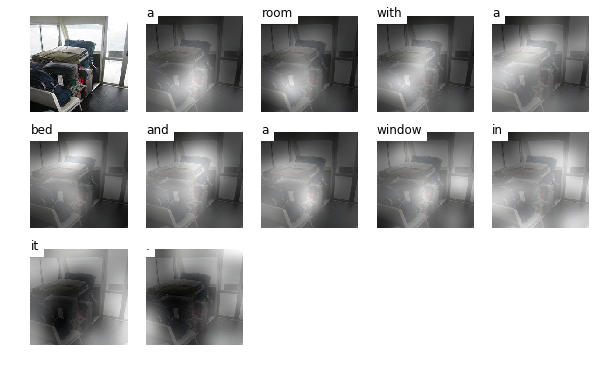

Sampled Caption: a cat sitting on a porch near a window .


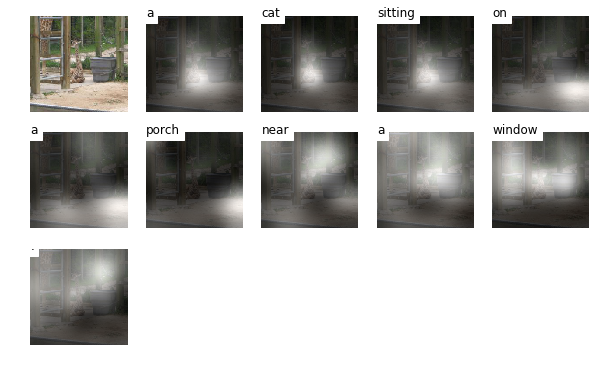

saved test.candidate.captions.pkl..


In [62]:
# sampled captions and visualize attention weights for validation dataset
solver.test(test_data, split='test')

In [63]:
# BLUE score for train dataset
#evaluate(data_path='./data', split='train')

In [64]:
# BLUE score for validation dataset
evaluate(data_path='./data', split='val')

{'reflen': 52212, 'guess': [52599, 47599, 42599, 37599], 'testlen': 52599, 'correct': [35362, 14958, 6413, 2920]}
ratio: 1.00741208917
Bleu_1:	0.672294150079
Bleu_2:	0.45963968272
Bleu_3:	0.316834371362
Bleu_4:	0.222933767892
METEOR:	0.218844870311
ROUGE_L: 0.521339549745
CIDEr:	0.692024895612


In [65]:
# BLUE score for validation dataset
evaluate(data_path='./data', split='test')

{'reflen': 52095, 'guess': [52541, 47541, 42541, 37541], 'testlen': 52541, 'correct': [35148, 14747, 6350, 2890]}
ratio: 1.00856128227
Bleu_1:	0.668963285815
Bleu_2:	0.455531931816
Bleu_3:	0.314051756847
Bleu_4:	0.220977940612
METEOR:	0.217593082137
ROUGE_L: 0.519437178567
CIDEr:	0.692563133819


In [8]:
(0.8)**0.25*(0.6)**0.25*(9350./42541)**0.25*(4890./37541)**0.25

0.34238288254445115

In [ ]:
ref= {}
ref[0] = {'a person in a bare field flying a big white kite .',
          'persone operating a kite with clear blue skies in a field .',
          'a person is fl'}